Amazon is an American multinational corporation that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence products. But it is mainly known for its e-commerce platform which is one of the biggest online shopping platforms today. 

There are so many customers buying products from Amazon that today Amazon earns an average of $ 638.1 million per day. So having such a large customer base, it will turn out to be an amazing data science project if we can analyze the sentiments of Amazon product reviews. 

The dataset we’re using was downloaded from Kaggle. This dataset contains the product reviews of over 568,000 customers who have purchased products from Amazon.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
sentiments = SentimentIntensityAnalyzer()

In [3]:
data = pd.read_csv("Reviews.csv")

In [4]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

Before moving forward, let’s take a look at some of the information needed from this dataset:

In [5]:
data.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values:

In [6]:
data = data.dropna()

### Sentiment Analysis

The **Score** column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy from Amazon:

In [7]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

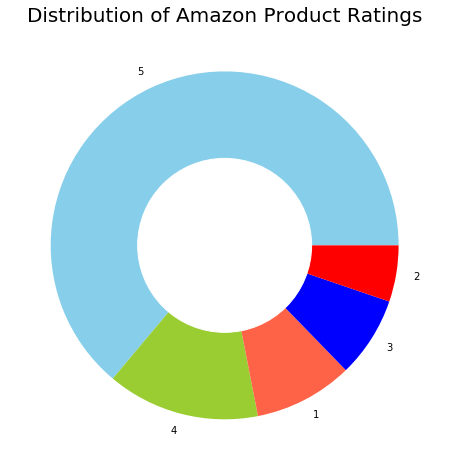

In [8]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]

plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, we’re going to add three more columns to this dataset as **Positive, Negative, and Neutral** by calculating the sentiment scores of the customer reviews mentioned in the **Text** column of the dataset:

In [11]:
sentiments = SentimentIntensityAnalyzer()

In [12]:
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]

In [13]:
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]

In [14]:
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]

In [15]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Positive  Negative  Neutral  
0     0.305     0.000    0.695  
1     0.000     0.138    0.862  
2     0.155     0.091    0.754  
3     0.000     0.000    1.000  
4     0.448     0.000    0.552

let’s see how most people rated the products they bought from Amazon:

In [16]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

In [17]:
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

In [18]:
sentiment_score(x, y, z)

Neutral 🙂 


So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of **Positive and Neural** are much higher than **Negative** scores